In [44]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import math

1. Смоделировать выборку из п независимых наблюдений над случайной величиной X,
имеющей нормальный закон распределения с параметрами (-2,9).

In [45]:
norm_r=sts.norm.rvs(loc=-2,scale=3, size=110)
print(norm_r)

[-6.71270782 -4.91245461 -5.3846     -5.95036934 -0.51811122 -4.04442909
 -2.68417683 -0.27934284 -2.605867   -7.49423258 -0.3712818  -2.56713489
  0.00898842  0.58760335 -1.93536097 -5.54679163 -7.45559571 -5.12882561
 -1.09944255 -5.10830319 -0.47952485 -4.42170253 -7.41559638 -1.64910763
  4.3046519  -3.24095486 -0.37335149 -3.86048638 -0.71661112 -5.95293227
 -5.62853778 -1.69210237 -0.54740328 -3.88145339 -1.82979797 -0.97779644
 -7.07195943 -2.81737371  1.82627029 -4.67608339  1.05719949 -2.2259688
 -3.00496676  0.41139166 -0.80022239 -5.27352322  2.32206651  5.79819728
 -0.062909   -5.43388607 -5.425612   -3.55130128 -7.8372714  -2.25210627
 -2.12593091 -5.33770652 -2.7430652  -2.39429247 -1.78319279 -0.71720269
  1.52114584 -3.80180715 -6.56423316 -3.92137495 -2.57642988  0.62176537
  3.34149419 -4.61146162 -7.14742087  0.26157932  1.16948969 -3.42035878
  0.21553666  1.65192413  0.72913926 -3.39783813 -8.16771602 -4.06929986
 -5.1632219  -8.70830947  3.83053779 -4.29644494  0.

In [46]:
def plot_norm(raspr):
    """
        отрисовывает распределение случайных точек по равномерному нормальному закону.
        a — параметр, характеризующий среднее значение
        sigma — параметр, характеризующий разброс параметров (СКО)
    """
    plt.hist(raspr, density=True, histtype='stepfilled',alpha=0.8)
    plt.title('Normal')

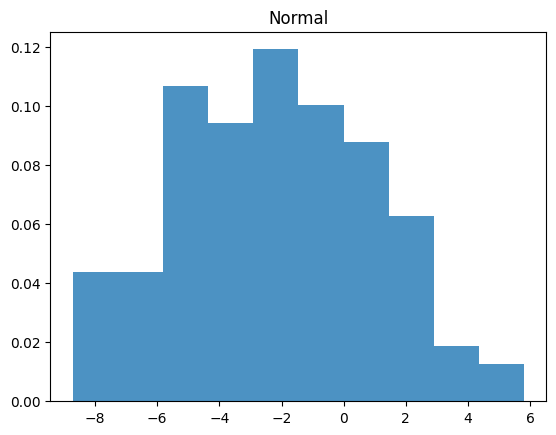

In [47]:
plot_norm(norm_r)

1.1. Сгруппировать данные в интервалы и найти интервальный ряд абсолютных
частот. Число интервалов группировки выбрать в соответствии с правилом,
указанном в Вашем варианте. Вычислить средствами Python сумму
абсолютных частот. Построить диаграмму абсолютных частот.

In [48]:
average = sum(norm_r) / len(norm_r) #среднее значение


In [49]:
sum_squared=0 #числитель для формулы Скотта
for i in norm_r:
    sum_squared+=(i-average)**2

In [50]:
s=math.sqrt(sum_squared/(110-1))
print(s)

3.1817219063265076


In [51]:
h=3.5*s*(110**(-1/3)) #ширина интервала
print(h)

2.3241600620174703


In [52]:
k=11/h #количество интервалов 
print(k)

4.7328926177535
